> 이번 챕터에서는 자연어 처리에서 필수적으로 사용되는 단어의 표현 방법인 원-핫 인코딩(One-hot encoding)과 워드 임베딩(Word Embedding). 문서를 벡터화하는 방법에 대해 학습한다.

# 12-01 NLP에서의 원-핫 인코딩(One-hot encoding)

원-핫 인코딩(One-hot encoding)은 단어를 표현하는 가장 기본적인 방법

**단어집합(Vocabulary): 서로 다른 단어들의 집합**
- 단어집합(vocabulary)에서는 기본적으로 book과 books와 같이 단어의 변형 형태도 다른 단어로 간주함.
- 즉, 텍스트의 모든 단어를 중복을 허용하지 않고 모아놓으면 이를 단어 집합이라고 함.

원-핫 인코딩을 위해서 먼저 할 일은 단어집합을 만드는일이며, 이후 단어 집합에 고유한 숫자를 부여하는 정수 인코딩을 진행함.


## 1. 원-핫 인코딩(One-hot encoding)이란?

원-핫 인코딩: 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여한 뒤, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
- 이렇게 표현된 벡터를 원-핫 벡터(one-hot vector)라 함

***원-핫 인코딩의 과정***
1. 단어집합의 각 단어에 고유한 인덱스를 부여한다.(정수 인코딩)
2. 표현하고 싶은 단어의 인덱스 위치에 1을 부여하고, 다른 단어의 인덱스 위치에는 0을 부여한다.

***Example***

한국어 자연어 처리로 원-핫 벡터를 만들어보자. 아래의 문장에 대해 진행한다
> 문장: 나는 자연어 처리를 배운다.

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 27.2 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다") # 형태소 토큰화 수행
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [ ]:
# 각 토큰에 대해 고유한 인덱스 부여. (빈도수를 고려하여 인덱스를 부여하기도 함)
word2index ={}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [ ]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index]=1
    return one_hot_vector

In [ ]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

## 2. 원-핫 인코딩(One-hot encoding의 한계)

1. 단어의 개수가 늘어날 수록 벡터를 저장하기 위해 필요한공간이 계속 늘어난다.
    - **벡터의 차원이 계속 늘어난다**고도 함.
    - 원-핫 벡터는 단어 집합의 크기가 곧 벡터의 차원수가 됨.
        - 모든 단어 각각은 하나의 값만 1을 가지고, 999개의 값은 0을 가지는 벡터가 되는데, 이는 저장 공간 측면에서 매우 비효율적
2. 원-핫 벡터는 단어의 유사도를 표현하지 못한다.
> 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다. 이 때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다. 좀 더 극단적으로는 강아지, 개, 냉장고라는 단어가 있을 때 강아지라는 단어가 개와 냉장고라는 단어 중 어떤 단어와 더 유사한지도 알 수 없습니다.

    - 단어 간 유사성을 알 수 없다는 단점은 검색 시스템 등에서 심각한 문제가 됨


# 12-02 워드 임베딩(Word Embedding)

워드 임베딩(Word Embedding): 단어를 벡터로 표현하는 것
- 엄밀히 말하자면, **워드 임베딩은 단어를 밀집 표현으로 변환하는 방법**이다.

## 1. 희소 표현(Sparse Representation)

희소 표현(sparse representation): 벡터 또는 행렬(matrix)의 값이 대부분 0으로 표현되는 방법
- 원-핫 벡터는 희소 벡터(sparse vector)임

***희소벡터의 문제점***
1. 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다.
    - 단어 집합이 클수록 고차원의 벡터가 될 것이다.

2. 단어 벡터 간 유사도를 표현할 수 없다.
    - dog, cat, computer, netbook, book이란 5개 단어에 대해서 원-핫 인코딩을 해본다고 하자. 코드로 표현하면 아래와 같다.

In [ ]:
import torch

In [ ]:
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

In [ ]:
# 원-핫 벡터간 코사인 유사도
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


어떤 단어들을 선택해서 코사인 유사도를 구해도 유사도가 전부 동일한 것을 볼 수 있다.
- 단어 간 의미적 유사도를 반영할 수 없다는 것은 자연어 처리에서 치명적이다.

## 2. 밀집 표현(Dense Representation)

밀집 표현(dense representation): 벡터의 차원을 단어 집합의 크기로 상정하지 않고, **사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춘다.**
- 이 과정에서 더이상 0과 1만 가진 값이 아니라 **실수 값을 가지게 된다.**
- 희소 표현과 반대되는 표현이다.

***Example***
```python
# 희소 표현의 예시
강아지 = [0 0 0 0 1 0 0 0 0 0 0 0 0.....0] #이때 1 뒤의 0의 수는 9995개, 차원은 10,000
```
사용자가 밀집 표현의 차원을 128로 정하고, 밀집 표현을 사용한다면, **모든 단어의 벡터 표현의 차원이 128로 바뀌면서 모든 값이 실수가 된다.**
```python
강아지 = [0.21.81.1‑2.11.12.8 ... 중략 ... ] # 이 벡터의 차원은 128
```
이 경우 벡터의 차원이 조밀해졌다고 하여, 밀집 벡터(dense vector)라고 한다.


## 3. 워드 임베딩(Word Embedding)
워드 임베딩: 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법
- **밀집 벡터**를 워드 임베딩 과정을 통해 나온 결과라고 하여 -> **임베딩 벡터(embedding vector)**라고도 한다.
- 워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있다.
- 파이토치에서 제공하는 `nn.embedding()`은 위의 방법들을 사용하지는 않지만, **단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용**한다.

<br>

***원-핫 벡터와 임베딩 벡터의 차이***

||원-핫 벡터|임베딩 벡터|
|--|--|--|
|**차원**|고차원(단어 집합의 크기)|저차원|
|**다른 표현**| 희소 벡터의 일종 | 밀집 벡터의 일종|
|**표현 방법**| 수동| 훈련 데이터로부터 학습함|
|**값의 타입**|1과 0|실수|

# 12-03 Word2Vec(워드투벡터)

> 원-핫 벡터는 단어간 유사도를 계산할 수 없다는 단점이 존재.  
**단어 간 유사도를 반영**할 수 있도록 단어의 의미를 벡터화할 수 있는 방법이 필요해짐  
-> Word2Vec

https://word2vec.kr/search/

위의 사이트는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트.  
단어들로 더하기, 빼기 연산을 할 수 있으며 아래와 같은 결과가 나옴
```
고양이 + 애교 = 강아지
한국 - 서울 + 도쿄 = 일본
박찬호 - 야구 + 축구 = 호나우두
```
-> 단어가 어떤 의미를 가지고 연산을 하고 있는 것처럼 보임
- 각 단어벡터가 **단어간 유사도를 반영한 값을 가지고 있기 때문**.

## 1. 희소 표현(Sparse Representation)

희소 표현(sparse representation): 벡터 또는 행렬(matrix)의 값 대부분이 0으로 표현되는 방법
- 원-핫 벡터는 희소 벡터(sparse vector)임

희소 표현은 각 단어간 유사성을 표현할 수 없다는 단점이 있었고, 이에 대한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾게됨.
- 이러한 표현 방법을 **분산 표현(distributed representation)**이라 함.
- 분산 표현을 이용하여 단어의 유사도를 벡터화하는 작업은 워드 임베딩(embedding)작업에 속하기 때문에 이렇게 표현된 벡터 또한 **임베딩 벡터**(embedding vector)라고 하며, 저차원을 가지므로 **밀집 벡터**(dense vector)에도 속함

## 2. 분산 표현

분산 표현(distributed representation) 방법은 기본적으로 **분포 가설**(distributional hypothesis)이라는 가정하에 만들어진 표현 방법

분포 가설: **비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다**는 가정
- ex. 강아지란 단어는 '귀엽다, 예쁘다, 애교'등의 단어가 함께 등장하는데, 분포 가설에 따라서 이런 텍스트를 벡터화하면 이 단어들은 의미적으로 가까운 단어가 됨.

분산 표현은 분포 가설을 이용하여 단어 집합을 학습하고, 단어의 의미를 벡터의 여러 차원에 분산하여 표현함.
- 이렇게 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로 -> **벡터의 차원이 상대적으로 저차원으로 줄어듦**


***Example***

- 원-핫 벡터 : `강아지 = [0 0 0 0 1 0 0 0 ... 0] # 1이란 값 뒤에는 0이 9995개 있는 벡터가 됨.`

- Word2Vec으로 임베딩된 벡터: `강아지 [0.2, 0.3, 0.5, 0.7, ..., 0.2]`
    - 강아지란 단어를 표현하기 위해 **사용자가 설정한 차원을 가지는 벡터가 되면서 각 차원은 실수값**을 가짐.

***요약***

희소표현: 고차원에 각 차원이 분리된 표현방법

분산표현: 저차원에 단어의 의미를 여러차원에다가 분산하여 표현함
- 분산 표현을 통해 단어간 유사도를 계산할 수 있음
- 요즘은 Word2Vec이 많이 쓰임

## 3. CBOW(Continuous Bag of Words)

Word2Vec에는 2가지 방식 존재.
1. CBOW(Continous Bag of Words)
    - 주변에 있는 단어들을 가지고 -> 중간에 있는 단어들을 예측하는 방법
2. Skip-Gram
    - 중간에 있는 단어들로 -> 주변단어들을 예측하는 방법

***CBOW***

> 이해를 위해 매우 간소화된 형태의 CBOW로 설명함.

```
문장: The fat cat sat on the mat
```
CBOW: 중간 단어를 예측하는 방법
- ex. {the, fat, cat, on, the, mat}에서 sat을 예측하는 것이 CBOW가 하는일.

**중심 단어**(center word): 예측해야하는 단어(ex. sat)

**주변 단어**(context word): 예측에 사용되는 주변 단어

**윈도우(window)**: 중심 단어를 예측하기 위해 앞, 뒤로 볼 단어의 개수(범위)
- ex. 윈도우 크기가 2이고, 예측하고자 하는 중심단어가 sat이라면 앞의 두 단어인 'fat'과 'cat', 그리고 뒤의 두 단어인 'on', 'the'를 참고함
- 윈도우 크기가 $n$이라면 -> 중심 단어를 예측하기 위해 참고하려고 하는 주변단어의 개수는 $2n$

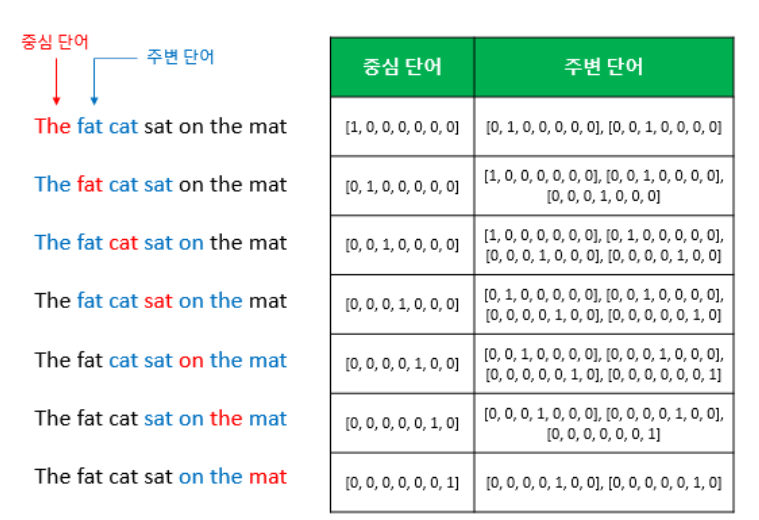

**슬라이딩 윈도우(sliding window)**: 크기가 정해진 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만드는 방법
- 위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일 때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터셋을 만드는지를 보여줌.
- **Word2Vec에서의 입력은 모두 원-핫 벡터**여야 함
    - 우측 상단의 그림은 중심 단어와 주변단어를 어떻게 선택했는지에 따라 각각 어떤 원-핫 벡터가 되는지를 보여줌
    - 즉, CBOW를 위한 전체 데이터 셋을 보여주는 것

***CBOW의 인공신경망 도식화***

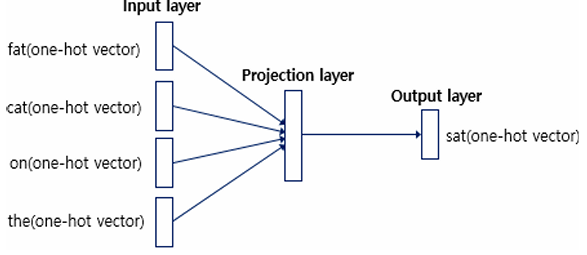

입력층(Input layer)의 입력: 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터

출력층(output Layer)의 출력: 예측하고자 하는 중간 단어의 점수(score vector)
- Word2Vec의 학습을 위해 이 중간 단어의 원-핫 벡터가 필요함

Word2Vec은 딥러닝 모델(Deep Learning model)은 아님.
- Word2Vec은 입력층과 출력층 사이에 하나의 은닉층만이 존재
    - 일반적으로 은닉층(hidden layer)이 1개인 경우에는 -> 심층신경망(Deep Neural Network)이 아니라 **얕은 신경망**(Shallow Neural Network)라고 부름
- Word2Vec의 은닉층은 일반적인 은닉층과 달리
    1. **활성화함수가 존재하지 않으며**,
    2. **룩업 테이블이라는 연산을 담당하는 층**이다.
    - 일반적인 은닉층과 구분하기 위해 **투사층**(projection layer)라고 부르기도 함.

***CBOW의 동작 메커니즘***

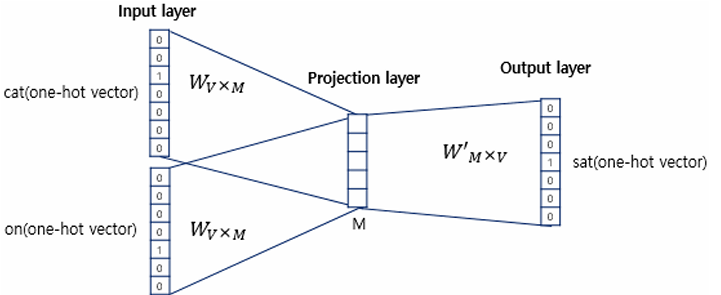

- $M$: 투사층의 크기
    - CBOW의 투사층의 크기 $M$은 **임베딩(밀집벡터로 변환)하고 난 뒤의 벡터의 차원**.
    - $M=5$이기 때문에, CBOW를 수행하고서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될것.

- $V$: 단어 집합의 크기
- 입력층과 투사층 사이의 가중치 $W$: $V \times M$
- 투사층과 출력층 사이의 가중치 $W'$: $M \times V$
- 두 가중치 행렬은 서로 다른 행렬.(transpose 시킨 것이 아님)

**CBOW의 목표**

인공 신경망의 훈련 전, 가중치 행렬 W와 W'은 굉장히 작은 랜덤값을 가짐.

CBOW는 주변단어로 중심단어를 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조

***입력 벡터와 가중치 행렬의 곱 수행과정***


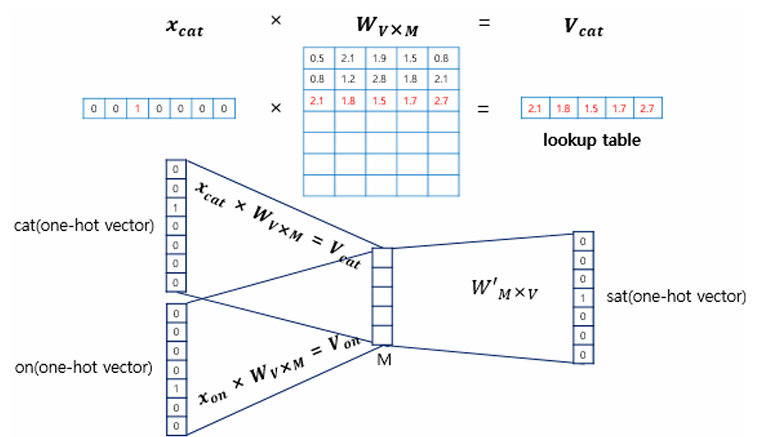

$x$: 각 주변 단어의 원-핫 벡터(첨자로 주변단어 표시)
- 입력 벡터는 원-핫 벡터

i번째 index에 1이라는 값을 가지고 그 이외는 0의 값을 가지는 **입력벡터와 가중치 행렬 $W$의 곱**은 사실 **W행렬의 i번째 항을 그대로 읽어오는 것(lookup)과 동일**(행렬 곱셈시, i번째 1과 겹치는 부분만이 살아남기 때문 = W의 i행)
- 그래서 이 연산을 룩업 테이블(lookup table)이라고 함.
- CBOW의 목적은 W와 W'를 잘 훈련시키는 것인데, 이것은 **lookup해온 W의 행벡터가 Word2Vec을 수행한 후의 각 단어의 임베딩 벡터이기 때문**.(M차원의 크기를 갖는 임베딩 벡터)

***평균 벡터***

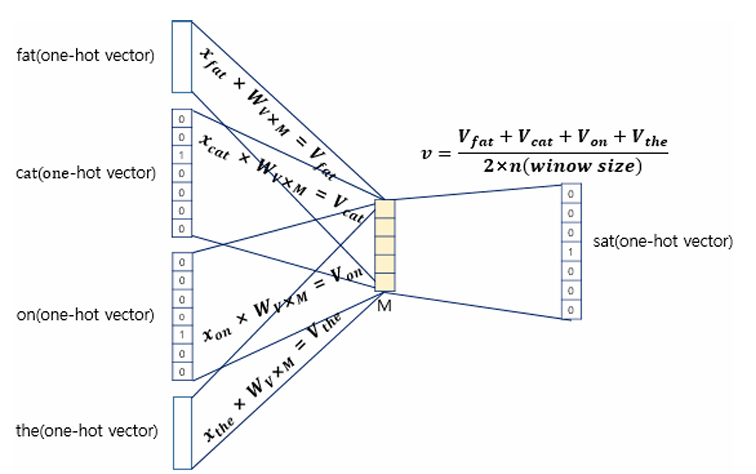

주변 단어의 원-핫 벡터에 대해 가중치 W가 곱해져서 생긴 결과 벡터들은 투사층에서 만나, 해당 벡터들의 평균인 벡터($v$)를 구하게 됨
- 윈도우 크기가 2라면, 입력 벡터의 개수 = 2n = 4개
    - 따라서, 평균을 구할 때는 4개의 결과 벡터에 대해 평균을 구함
- 투사층에서 벡터의 평균을 구하는 것은 CBOW과 Skip-gram의 차이점.
    - Skip-Gram은 입력이 중심 단어 하나라 투사층에서 벡터의 평균을 구하지 않음

***평균 벡터와 가중치 행렬의 곱 수행과정***

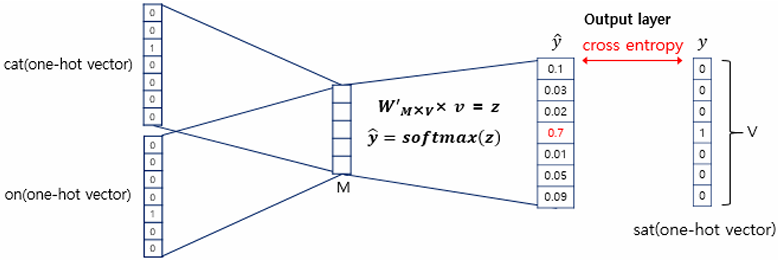

이렇게 구해진 평균 벡터가 두번째 가중치 행렬 $W'$과 곱해짐.
- 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옴
    - 입력 벡터의 차원이 7이라면 여기서 나오는 벡터도 차원이 7

이 벡터에 CBOW는 소프트맥스 함수를 취함
- 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀜.
- **평균 벡터에 소프트맥스 함수를 취한** 이 벡터를 **스코어벡터**(score vector)라고 함.

<br>

**스코어 벡터의 각 차원 안에서의 값**

j번째 인덱스가 가진 0~1사이의 값 = **j번째 단어가 중심 단어일 확률**
- 스코어 벡터는 우리가 실제로 값을 알고 있는 벡터인 중심 단어의 원-핫벡터의 값과 가까워져야함.

<br>

***update 공식***

$y$: 중심 단어의 원-핫 벡터

$\hat{y}$ : 스코어 벡터

loss function(손실함수): cross-entropy 함수

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 아래와 같다.

$$H(\hat{y},y) = - \sum\limits_{j=1}^{|V|}y_jlog(\hat{y_j})$$

<br>

y가 원-핫 벡터임을 고려했을때, 아래의 식으로 간소화됨.
- element 값이 1(정답)이 아니라면, $y_j=0$이 되어 사라지기 때문. 따라서, 값이 1인 부분에 대해서만 고려하면 됨.

$$H(\hat{y},y) = - y_jlog(\hat{y_j})$$

$c$를 중심단어에서 값이 1인 차원의 인덱스라고 하면,
$\hat{y}_c = 1$은 $\hat{y}$이 $y$를 정확하게 예측한 경우가 됨.
- 이 경우 $-1 \times log(1)$=0이 되기 때문에, $\hat{y}$이 $y$를 정확하게 예측한 경우의 cross-entropy 값 = 0
- 따라서 위의 식을 최소화하는 방향으로 학습하면 됨
- 역전파(Back Propagation)을 수행하면 $W$와 $W'$이 학습되며, 학습이 다 된 경우 M차원의 크기를 갖는 $W$의 행이나 $W'$의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됨
    - 때로는 $W$와 $W'$의 평균치를 가지고 임베딩 벡터를 선택하기도 함


## 4. Skip-Gram

메커니즘은 CBOW와 동일하며, Skip-Gram은 중심단어에서 주변단어를 예측하는 방법

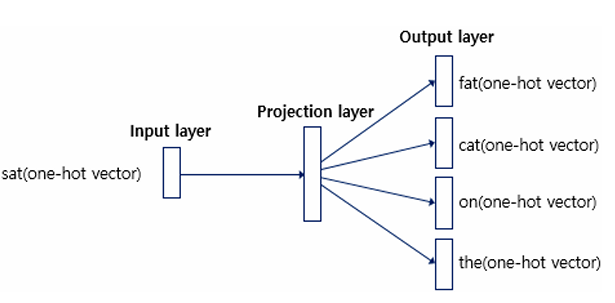

중심 단어에서 주변 단어들을 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없음.

전반적으로 Skip-Gram이 CBOW보다 성능이 좋다고 알려져 있음

## 5. 네거티브 샘플링(Negative Sample)

대체적으로 Word2Vec을 사용한다고 하면 **SGNS**(Skip-Gram with Negative Sampling)을 사용함.
- Skip-Gram을 사용하는데, 네거티브 샘플링(Negative Sampling)이란 방법까지 추가로 사용한다는 뜻

Word2Vec 모델의 문제점 1가지는 **속도가 느리다**는 것.

Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 **임베딩 테이블($W$)에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트**한다.
- 중심 단어나 주변단어와 전혀 상관 없는 단어라도 마찬가지.
- 즉, Word2Vec이 모든 단어 집합에 대해서 소프트맥스 함수를 수행하고, 역전파를 수행하므로 **주변 단어와 상관 없는 모든 단어까지의 워드 임베딩 조정 작업(가중치 업데이트)을 수행하고 있는 것.**
    - '강아지'와 '고양이'와 같은 단어에 집중하고 있다면, '돈가스'나 '컴퓨터'와 같은 연관관계가 없는 단어들의 임베딩 벡터를 조정할 필요는 없음

**방법**

ref: https://wikidocs.net/69141

전체 단어 집합이 아닌 일부 단어집합에 대해서만 고려하면 됨.
- **상관없는 단어들 중에서는 전체가 아닌 몇개의 단어만 추출하여 학습에 사용**하여 가중치를 업데이트한다는 뜻.

1. '강아지', '고양이', '애교'와 같은 주변 단어들을 모두 가져옴
2. '돈가스', '컴퓨터', '회의실'과 같은 주변 단어가 아닌 랜덤으로 선택된 상관없는 단어들의 일부를 가지고 옴.
3. 이렇게 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어 놓고, 마지막 단계를 이진 분류 문제로 바꿔버리면 됨.
- 즉, 기존의 다중 클래스 분류 문제를 -> 주변 단어들을 긍정(positive, label=1)로 두고, 랜덤으로 샘플링된 단어들을 부정(negative, label=0)으로 둔 다음에 이진 분류 문제를 수행하는 것.


# 12-04 Word2Vec 학습 및 시각화

> `gensim` 패키지에서 Word2Vec 구현을 제공합니다

## 1. 영어 Word2Vec 만들기

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

### 1) 훈련 데이터 이해하기

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7b3de2860450>)

```xml
<file id="1">
  <head>
<url>http://www.ted.com/talks/knut_haanaes_two_reasons_companies_fail_and_how_to_avoid_them</url>
       <pagesize>72832</pagesize>
... xml 문법 중략 ...
<content>
Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities:
... content 내용 중략 ...
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
... content 내용 중략 ...
(Applause)
</content>
</file>
<file id="2">
    <head>
<url>http://www.ted.com/talks/lisa_nip_how_humans_could_evolve_to_survive_in_space<url>
... 이하 중략 ...

```

얻고자하는 실질적 데이터는영어 문장으로 구성된 내용을 담고 있는 `<content>`와 `</content>` 사이의 내용

### 2) 훈련 데이터 전처리하기

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
targetXML = open('/content/ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)    #  lxml 라이브러리를 통해 XML 파일을 파싱하여 트리 구조로 저장

# xml파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))   # XPath 문법을 사용하여 <content> 태그 안의 텍스트만 추출합니다.

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter)등의 배경음 부분을 제거
# 해당 코드는 괄호로 구성된 내용을 제거
content_text = re.sub(r'\([^)]*\)','',parse_text)   # 닫는 괄호 )를 제외한 0개이상 문자들을 공백처리

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+"," ", string.lower())  #a-z0-9를 제외한 1개 이상의 문자를 공백으로 바꿈
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [ ]:
!pip install gensim

이후, 런타임 -> 세션 다시시작 필요

- `vector_size`: 워드 벡터의 특징값. 즉, 임베딩된 벡터의 차원
- `window` : 컨텍스트 윈도우 크기
- `min_count`: 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.)
- `workers`: 학습을 위한 프로세스 수
- `sg`=0은 CBOW, 1은 skip-gram

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

`model.wv.most_similar`: Word2Vec은 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 메소드를 지원함

In [ ]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8488041758537292), ('guy', 0.807964026927948), ('boy', 0.7907249927520752), ('lady', 0.7832739949226379), ('girl', 0.7688634395599365), ('soldier', 0.7461749315261841), ('gentleman', 0.7254148721694946), ('kid', 0.693709671497345), ('poet', 0.6732618808746338), ('friend', 0.667831301689148)]


### 4) Word2Vec 모델 저장하고 로드하기

학습한 모델을 언제든 나중에 다시 사용할 수 있도록 컴퓨터 파일로 저장하고 로드할 수 있음

In [ ]:
model.wv.save_word2vec_format('eng_w2v')    # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_reulst = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8488041758537292), ('guy', 0.807964026927948), ('boy', 0.7907249927520752), ('lady', 0.7832739949226379), ('girl', 0.7688634395599365), ('soldier', 0.7461749315261841), ('gentleman', 0.7254148721694946), ('kid', 0.693709671497345), ('poet', 0.6732618808746338), ('friend', 0.667831301689148)]


## 2. 한국어 Word2Vec 만들기 (네이버 영화리뷰)

네이버 영화 리뷰 데이터로 한국어 Word2Vec을 만들어보자.

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 36.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7b3dc400f850>)

In [ ]:
train_data = pd.read_table('ratings.txt')   # 네이버 영화리뷰 데이터를 데이터 프레임으로 로드

In [ ]:
train_data[:5]  # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data))  # 리뷰 개수 출력

200000


In [ ]:
# NULL값 존재 유무
print(train_data.isnull().values.any())

True


In [ ]:
# 결측값이 존재하는 행 제거
train_data = train_data.dropna(how='any')   # Null값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null값이 존재하는지 확인

False


In [ ]:
print(len(train_data))  # 결측값이 삭제된 후의 리뷰 개수 출력

199992


***한글이 아닌 경우의 문자 제거***

In [ ]:
# 정규 표현식을 통한 한글외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]","",regex=True)

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

> 아래 코드가 매우 오래 걸리므로 주의

***불용어 제거 및 형태소 토큰화 수행***

In [ ]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로','자','에','와','한','하다']

# 형태소 분석기 Okt를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)    # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [2:15:17<00:00, 24.64it/s]


토큰화가 수행된 상태에서는 각 리뷰의 길이 분포 또한 확인할 수 있음

리뷰의 최대 길이 :  68
리뷰의 평균 길이 :  10.685057402296092


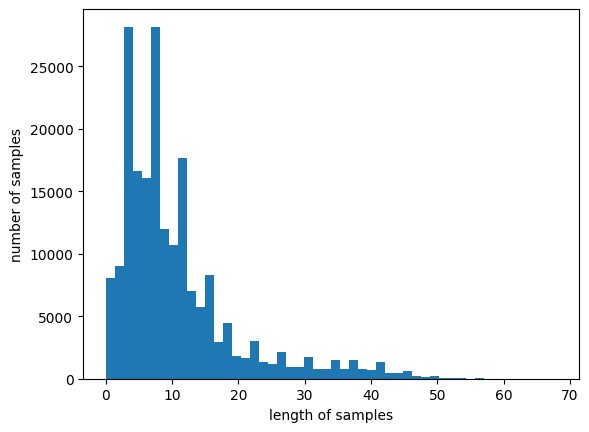

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 : ', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

***Word2Vec으로 토큰화된 네이버 영화 리뷰 데이터 학습***

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size=100, window=5, min_count=5, workers=5, sg=0)

In [ ]:
#  완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17961, 100)

총 17961개의 단어가 존재하며, 각 단어는 100차원으로 구성됨.

In [ ]:
print(model.wv.most_similar("최민식"))  # '최민식'과 유사한 단어 뽑기

[('한석규', 0.8683650493621826), ('안성기', 0.8679181933403015), ('윤제문', 0.8655496835708618), ('전도연', 0.863567054271698), ('김수현', 0.8592685461044312), ('이정재', 0.846602201461792), ('김승우', 0.8383797407150269), ('설경구', 0.8379367589950562), ('찰떡', 0.8376778364181519), ('이주연', 0.8366487622261047)]


In [ ]:
print(model.wv.most_similar("히어로"))  # '히어로'와 유사한 단어 뽑기

[('느와르', 0.8714247345924377), ('무협', 0.8608572483062744), ('호러', 0.8493756651878357), ('블록버스터', 0.8383088111877441), ('무비', 0.8247250914573669), ('홍콩', 0.813332200050354), ('슬래셔', 0.8040642738342285), ('판타지', 0.8029685020446777), ('정통', 0.8023422360420227), ('멜로', 0.8009578585624695)]


## 3. 사전훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding)소개

자연어 처리 작업시 케라스의 `Embedding()`으로 갖고 있는 훈련 데이터로부터 처음부터 임베딩벡터를 훈련시키기도 하지만,

위키피디아등의 방대한 데이터로 **사전에 훈련된 워드 임베딩**(pre-trained word embedding vector)을 가지고 와서 사용할 수도 있음.
- 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면 -> 다른 방대한 데이터를  사전에 Word2Vec이나 GloVe 등으로 학습시켜 놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능을 보임.

구글에서 제공하는 사전 훈련된 Word2Vec 모델을 사용하는 방법에 대해 알아보자.
- 단어들의 유사도를 구하는 실습을 진행해볼 것.
- 구글은 사전훈련된 3백만 개의 Word2Vec 단어 벡터들을 제공함.
- 각 임베딩 벡터의 차원은 300

모델 다운로드 후, 파일 경로를 기재해서 불러오면 됨

In [ ]:
import gensim
import urllib.request

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(word2vec_model.vectors.shape)

(3000000, 300)


모델의 크기는 3백만 x 300
- 즉, 3백만개의 단어와 각 단어의 차원은 300
- 용량: 3백만 단어 * 300 feature * 4bytes/feature ~ 3.35GB

In [ ]:
# 두 단어의 유사도 계산
print(word2vec_model.similarity('this','is'))
print(word2vec_model.similarity('post','book'))

0.40797037
0.057204384


In [ ]:
print(word2vec_model['book'])   # 단어 'book'의 벡터 출력

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

Word2Vec 모델은 자연어 처리에서 단어를 밀집 벡터로 만들어주는 단어 임베딩 방법론.
- 최근에 들어서 자연어 처리를 넘어 추천 시스템에도 사용됨.
    - 적당하게 데이터를 나열해주면 Word2Vec은 위치가 근접한 데이터를 유사도가 높은 벡터로 만들어준다는 점에서 착안된 아이디어.
    - item2vec이라는 것이 이에 해당된다고 함.

## 4. 워드 임베딩 모델로부터 2개의 tsv 파일 생성하기

구글은 임베딩 프로젝터(embedding projector)라는 데이터 시각화 도구를 지원함.
- 시각화를 위해서는 모델을 학습하고, 파일로 저장되어있어야함.

```shell
!python -m gensim.scripts.word2vec2tensor --input 모델이름 --output 모델이름
```

위의 커맨드를 통해 시각화에 필요한 파일 생성 가능

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v  # 편의를 위해 실습때 사용한 eng_w2v 재사용

2025-05-24 15:06:57,299 - word2vec2tensor - INFO - running /usr/local/lib/python3.11/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2025-05-24 15:06:57,299 - keyedvectors - INFO - loading projection weights from eng_w2v
2025-05-24 15:06:58,996 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-05-24T15:06:58.993466', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2025-05-24 15:07:00,596 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2025-05-24 15:07:00,596 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2025-05-24 15:07:00,597 - word2vec2tensor - INFO - finished running word2vec2tensor.py


아래와 같이 2개의 파일이 더 생김

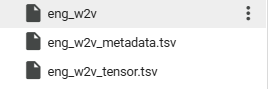

다른 모델 파일 이름으로 진행할시 아래와 같은 파일명을 가질 것.
- `모델이름_metadata.tsv`
- `모델이름_tensor.tsv`

## 5. 임베딩 프로젝터를 사용하여 시각화하기

link: https://projector.tensorflow.org/

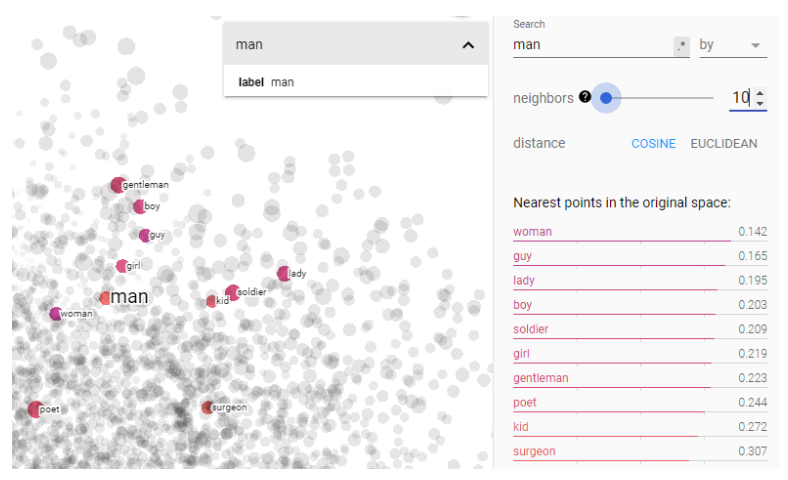

# 12-05 글로브와 패스트텍스트

> 여름방학 이후 작성.